${\color{red} \mathrm{PROBLEM}: Hybrid-Barotropic}$  ${\color{red}EoS}$

Equations of states (EoSs) in hydrodynamics are the relation of the pressure locally to the local variables of state of a system (e.g. matter density $\rho$, specific internal energy $\epsilon$ or temperature $\textit{T}$). Simulations of hydrodynamic systems generally use an EOS to parameterize the microphysics which cannot
be captured in first principle by continuum hydrodynamic equations. Only the simplest regimes have
analytic equation EOSs, like an ideal gas law $P = \rho\epsilon(\Gamma - 1)$. In the regime of neutron star interiors, the
applicable EoSs are very much a topic of research. Realistic EoSs for neutron star interiors are often
generated by physicists using varying degrees of relativity, quantum field theory, and particle physics
models.

First we need to define the function that performs General Lagrangian-polynomial Interpolation. Which is given by;

$$\phi(x) = \sum_{i=0}^{n} y_i \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def interp(xs,ys,n,x):
    fn=0
    for i in range(n): #loop for performing Summation
        t = 1
        for j in range(n): #Loop for performing multiplication
            if i==j: #condition for invalid argument
                continue
            else:
                t = (x - xs[j])/(xs[i] - xs[j])*t

        fn = t*ys[i] + fn

    return fn

While the simplest EoS, the barotropic EoS, is of the form $P(\rho) = \kappa\rho^\Gamma$, a simple step to add more physics (e.g. by imitating a change in chemistry above a certain density $\rho_{0}$) is to create a hybrid-barotropic EoS which we will approximate here as:
$$P(\rho) = H(\rho_{T} - \rho)\kappa_{1}\rho^{\Gamma_{1}} + H(\rho - \rho_{T})\kappa_{2}\rho^{\Gamma_{2}}$$
where $\Gamma_{1} = \frac{4}{3}$, $\Gamma_{2} = \frac{5}{3}$, $\kappa_{1} = 20$, $\kappa_{2} = 1$. For the transition function, $H(\rho)$, we have used the following analytical approximation of the Heaviside function:
$$H(x) = \frac{1}{2}(1 + tanh(\alpha x))$$
with the transition density $\rho_{T} = 5$, and transition speed parameter $\alpha = 5$.

Now, we need to analytically fill the known data arrays, $xs[i] = \rho_{i}$ and $ys[i] = P(\rho_{i})$ over a uniform distribution of $n$ points $xi = \rho i$
on the interval $I = [\rho_{0}, \rho_{1}]$.

In [3]:
g_1 = 4/3
g_2 = 5/3
k_1 = 20
k_2 = 1
rho_T = 5
alpha = 5

def H(alpha,x):
    return 0.5*(1 + np.tanh(alpha*x))

def P(rho,alpha,rho_T,k_1,k_2,g_1,g_2):
    return H(alpha,rho_T - rho)*k_1*(rho**(g_1)) + H(alpha,rho - rho_T)*k_2*(rho**(g_2))

n1 = [5,10,20]
xs = np.linspace(3, 7, n1[2]) #Array of Uniform Density Distribution
ys = [P(rho,alpha,rho_T,k_1,k_2,g_1,g_2) for rho in xs] #list comprehension for the loop calculation Pressure for corresponding Desnsity

In the above section, we have defined all the necessary constants, the Heaviside $H(x)$ and the EoS function $P(\rho)$. After defining the function, we have created an array $xs$ of uniform density distribution within the Interval $I = [3,7]$ of $n = 20$ points and another array $ys$ of corresponding pressure using the pre-defined function $P(\rho)$.

For testing and analysis, we have created different arrays as $xk_s$ and $yk_s$ correspond to different $n$ values as $n = [5,10,20]$ within the uniform density interval $I = [4.4,5.5]$ for $m = 200$ points. Here, we will create these arrays by using previously defined Lagrange-Polynomial Interpolating function "$interp$" for $xs$ and $ys$. The code and the plot of the outcomes are shown below; 

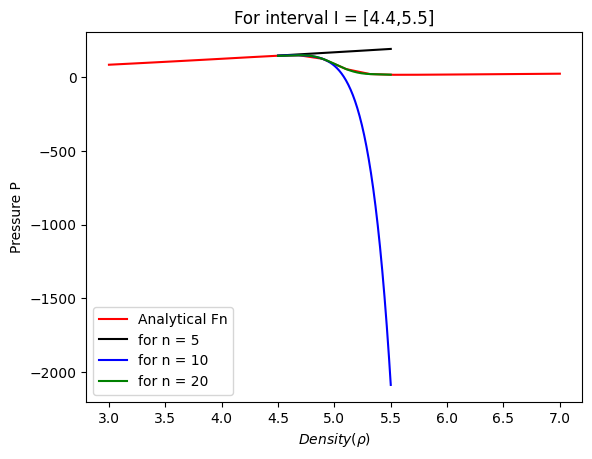

In [4]:
m = 200
xk = np.linspace(4.5,5.5,m)
yk_1 = [interp(xs,ys,n1[0],rho) for rho in xk]
yk_2 = [interp(xs,ys,n1[1],rho) for rho in xk]
yk_3 = [interp(xs,ys,n1[2],rho) for rho in xk]

plt.figure('Pressure vs Density')
plt.title("For interval I = [4.4,5.5]")
plt.plot(xs,ys,color="red",label = 'Analytical Fn')
plt.plot(xk,yk_1, color="black",label = 'for n = 5')
plt.plot(xk,yk_2, color="blue",label = 'for n = 10')
plt.plot(xk,yk_3, color="green",label = 'for n = 20')
plt.xlabel(r"$Density (\rho)$")
plt.ylabel("Pressure P")
plt.autoscale()
plt.legend()
plt.show()

The same plot for the interval $I = [0,10]$ is given below;

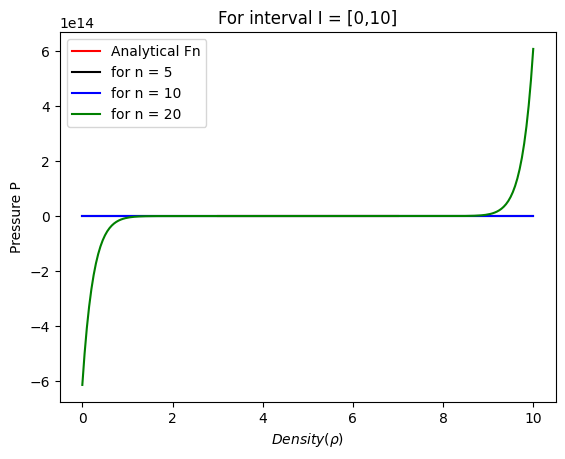

In [5]:
xk10 = np.linspace(0,10,m)
yk_10 = [interp(xs,ys,n1[0],rho) for rho in xk10]
yk_20 = [interp(xs,ys,n1[1],rho) for rho in xk10]
yk_30 = [interp(xs,ys,n1[2],rho) for rho in xk10]

plt.figure('Pressure vs Density')
plt.title("For interval I = [0,10]")
plt.plot(xs,ys,color="red",label = 'Analytical Fn')
plt.plot(xk10,yk_10, color="black",label = 'for n = 5')
plt.plot(xk10,yk_20, color="blue",label = 'for n = 10')
plt.plot(xk10,yk_30, color="green",label = 'for n = 20')
plt.xlabel(r"$Density (\rho)$")
plt.ylabel("Pressure P")
plt.autoscale()
plt.legend()
plt.show()

Now, need to calculate the chi-squared error for the entire function which is given by;
$$\sqrt{\frac{1}{m}\sum^{m - 1}_{k = 0}(f(x_{k}) - y_{k})^{2}}$$.

In [24]:
f_xk = [P(rho,alpha,rho_T,k_1,k_2,g_1,g_2) for rho in xk]
E1 = 0
for j in range(m):
    t1 = (f_xk[j] - yk_3[j])**2
    E1 += t1

E1 = np.sqrt((1/m)*E1)
print(E1)

0.9271971050477467


In the above code block, we have calculated the chi-squared error for $f(x_{k})$ and $y_{k}$ for $m = 200$ points within the interval $I = [4.4,5.5]$ and $n = 20$ points.

${\color{red}Note:}$ Here, $m$ is number of density points within the interval $I$ while $n$ is the number of interpolating points used in the function defined earliar.

Further, we need to plot $log(E)$ vs $n$ for $n = 3$ to $n = 40$ for the uniform density intervals $I = [4.5,5.5]$, $I = [0,10]$ and $I = [0,30]$.

1) For $I = [4.4,5.5]$:

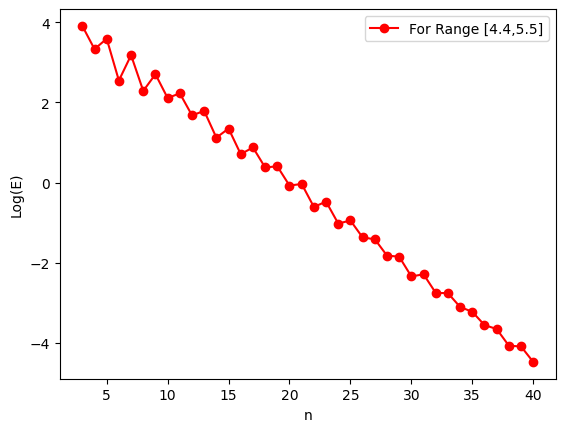

In [29]:
n = np.arange(3,41,1)
xk_1 = np.linspace(4.5,5.5,m)
yk_1 = []
E_1 = []
f_xk = [P(rho, alpha, rho_T, k_1, k_2, g_1, g_2) for rho in xk_1]
for i in range(len(n)):
    xs = np.linspace(3, 7, n[i])
    ys = [P(rho, alpha, rho_T, k_1, k_2, g_1, g_2) for rho in xs]
    
    yk__ = [interp(xs, ys, n[i], rho) for rho in xk_1]
    yk_1.append(yk__)
    E1 = 0
    for j in range(m):
        t1 = (f_xk[j] - yk__[j]) ** 2
        E1 += t1
    
    E_1.append(np.log(np.sqrt((1 / m) * E1)))

plt.figure(r"$log(E) vs. n$")
plt.plot(n, E_1, marker="o", color="Red", label = "For interval [4.4,5.5]")
plt.xlabel("n")
plt.ylabel("Log(E)")
plt.legend()
plt.show()

2) For interval $I = [0,10]$.

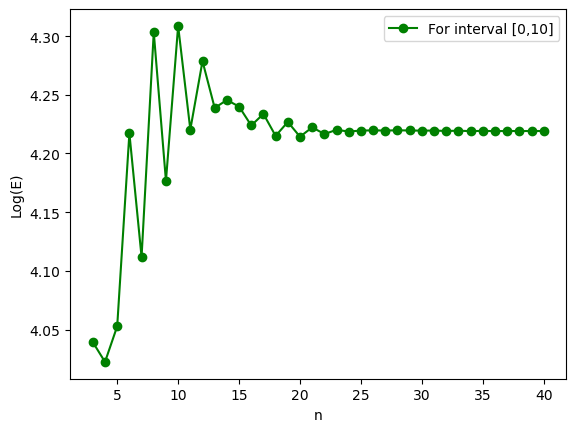

In [30]:
xk_2 = np.linspace(0,10,m)
yk_2 = []
E_2 = []
f_xk = [P(rho, alpha, rho_T, k_1, k_2, g_1, g_2) for rho in xk_2]
for i in range(len(n)):
    xs = np.linspace(3, 7, n[i])
    ys = [P(rho, alpha, rho_T, k_1, k_2, g_1, g_2) for rho in xs]
    
    yk__ = [interp(xs, ys, n[i], rho) for rho in xk]
    yk_2.append(yk__)
    E1 = 0
    for j in range(m):
        t1 = (f_xk[j] - yk__[j]) ** 2
        E1 += t1
    
    E_2.append(np.log(np.sqrt((1 / m) * E1)))

plt.figure(r"$log(E) vs. n$")
plt.plot(n, E_2, marker="o", color="Green", label = "For interval [0,10]")
plt.xlabel("n")
plt.ylabel("Log(E)")
plt.legend()
plt.show()

3) For interval $I = [0,30]$.

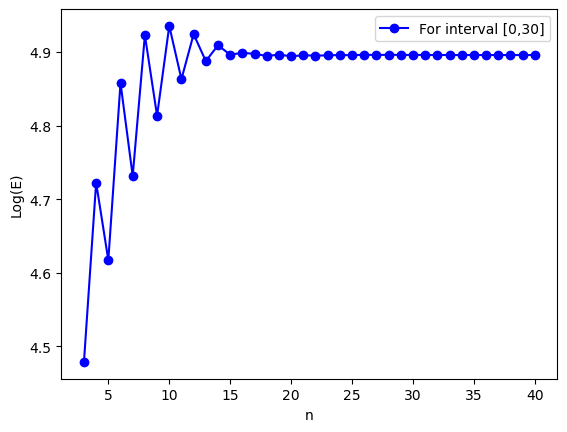

In [31]:
xk_3 = np.linspace(0,30,m)
yk_3 = []
E_3 = []
f_xk = [P(rho, alpha, rho_T, k_1, k_2, g_1, g_2) for rho in xk_3]
for i in range(len(n)):
    xs = np.linspace(3, 7, n[i])
    ys = [P(rho, alpha, rho_T, k_1, k_2, g_1, g_2) for rho in xs]
    
    yk__ = [interp(xs, ys, n[i], rho) for rho in xk]
    yk_3.append(yk__)
    E1 = 0
    for j in range(m):
        t1 = (f_xk[j] - yk__[j]) ** 2
        E1 += t1
    
    E_3.append(np.log(np.sqrt((1 / m) * E1)))

plt.figure(r"$log(E) vs. n$")
plt.plot(n, E_3, marker="o", color="Blue", label = "For interval [0,30]")
plt.xlabel("n")
plt.ylabel("Log(E)")
plt.legend()
plt.show()